## Machine Learning and Deep learning 

In [122]:
import numpy as np 
from numpy import genfromtxt 
import cv2

In [123]:
data = genfromtxt("../DATA/bank_note_data.txt",delimiter= ",")

In [124]:
data

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [125]:
X = data[:,0:4]
Y = data[:,4]

In [126]:
Y

len(X)

1372

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42 )

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
scaler_object = MinMaxScaler()

In [131]:
scaler_object.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [132]:
scaled_X_train = scaler_object.transform(X_train)
scaled_X_test = scaler_object.transform(X_test)

In [133]:
from keras.models import Sequential
from keras.layers import Dense

In [134]:
model = Sequential()
model.add(Dense(4,input_dim=4,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [135]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [136]:
model.fit(scaled_X_train,Y_train,epochs=50,verbose=2)

Epoch 1/50
 - 1s - loss: 0.7311 - acc: 0.4200
Epoch 2/50
 - 0s - loss: 0.7060 - acc: 0.4820
Epoch 3/50
 - 0s - loss: 0.6905 - acc: 0.5702
Epoch 4/50
 - 0s - loss: 0.6807 - acc: 0.6681
Epoch 5/50
 - 0s - loss: 0.6744 - acc: 0.6246
Epoch 6/50
 - 0s - loss: 0.6680 - acc: 0.6159
Epoch 7/50
 - 0s - loss: 0.6599 - acc: 0.6311
Epoch 8/50
 - 0s - loss: 0.6490 - acc: 0.6561
Epoch 9/50
 - 0s - loss: 0.6342 - acc: 0.6910
Epoch 10/50
 - 0s - loss: 0.6180 - acc: 0.7203
Epoch 11/50
 - 0s - loss: 0.6023 - acc: 0.7291
Epoch 12/50
 - 0s - loss: 0.5870 - acc: 0.7410
Epoch 13/50
 - 0s - loss: 0.5704 - acc: 0.7530
Epoch 14/50
 - 0s - loss: 0.5543 - acc: 0.7682
Epoch 15/50
 - 0s - loss: 0.5377 - acc: 0.7780
Epoch 16/50
 - 0s - loss: 0.5208 - acc: 0.7933
Epoch 17/50
 - 0s - loss: 0.5042 - acc: 0.8009
Epoch 18/50
 - 0s - loss: 0.4886 - acc: 0.8183
Epoch 19/50
 - 0s - loss: 0.4733 - acc: 0.8270
Epoch 20/50
 - 0s - loss: 0.4572 - acc: 0.8357
Epoch 21/50
 - 0s - loss: 0.4415 - acc: 0.8455
Epoch 22/50
 - 0s - lo

In [137]:
#model.predict_classes(scaled_X_test)
model.metrics_names

['loss', 'acc']

In [138]:
from sklearn.metrics import confusion_matrix,classification_report

In [139]:
predictions = model.predict_classes(scaled_X_test)

In [140]:
confusion_matrix(Y_test,predictions)

array([[253,   4],
       [ 17, 179]], dtype=int64)

In [141]:
print(classification_report(Y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.94      0.98      0.96       257
        1.0       0.98      0.91      0.94       196

avg / total       0.95      0.95      0.95       453



In [142]:
model.save('my_model.h5')

## MNIST Dataset 

In [143]:
from keras.datasets import mnist

In [144]:
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

In [145]:
import matplotlib.pyplot as plt 
%matplotlib inline 

In [146]:
X_train.shape

(60000, 28, 28)

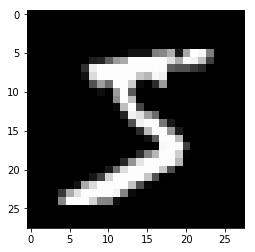

In [147]:
single_image = X_train[0]
single_image 
plt.imshow(X_train[0],cmap='gray')

In [148]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [149]:
Y_train.shape

(60000,)

In [150]:
from keras.utils.np_utils import to_categorical 

In [151]:
Y_cat_test = to_categorical(Y_test,10)
Y_cat_train = to_categorical(Y_train,10)

In [152]:
Y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [153]:
X_train = X_train/X_train.max() 
X_test  = X_test/X_test.max()
X_train[0].max()
X_train[0].shape

(28, 28)

In [154]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_train[0].shape

(28, 28, 1)

In [155]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [156]:
from keras.models import Sequential

In [157]:
from keras.layers import Dense,Conv2D,MaxPool2D, Flatten

In [158]:
model = Sequential()
# Convolutional Layers 
model.add(Conv2D(filters=32, kernel_size = (4,4), input_shape = (28, 28, 1), activation = 'relu'))
# Pooling Layer 
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [159]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [160]:
model.fit(X_train, Y_cat_train, epochs = 10 )

Epoch 1/10
60000/60000 [==============================] - 39s 658us/step - loss: 0.1310 - acc: 0.9598
Epoch 2/10
60000/60000 [==============================] - 40s 663us/step - loss: 0.0474 - acc: 0.9861
Epoch 3/10
60000/60000 [==============================] - 39s 656us/step - loss: 0.0345 - acc: 0.9898
Epoch 4/10
60000/60000 [==============================] - 39s 656us/step - loss: 0.0259 - acc: 0.9926
Epoch 5/10
60000/60000 [==============================] - 37s 609us/step - loss: 0.0215 - acc: 0.9938
Epoch 6/10
60000/60000 [==============================] - 36s 608us/step - loss: 0.0172 - acc: 0.9952
Epoch 7/10
60000/60000 [==============================] - 42s 699us/step - loss: 0.0142 - acc: 0.9962
Epoch 8/10
60000/60000 [==============================] - 44s 728us/step - loss: 0.0115 - acc: 0.9973
Epoch 9/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0095 - acc: 0.9976
Epoch 10/10
60000/60000 [==============================] - 42s 700us/step - loss: 

In [161]:
model.evaluate(X_test,Y_cat_test)

10000/10000 [==============================] - 2s 166us/step


[0.06676185158486446, 0.9877]

In [162]:
from sklearn.metrics import classification_report, confusion_matrix

In [165]:
prediction = model.predict_classes(X_test)

#print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
#prediction[0]

In [166]:
print(classification_report(Y_test,prediction))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       980
          1       1.00      0.99      1.00      1135
          2       0.99      0.99      0.99      1032
          3       0.98      1.00      0.99      1010
          4       0.98      0.99      0.99       982
          5       0.99      0.99      0.99       892
          6       0.99      0.98      0.99       958
          7       0.99      0.99      0.99      1028
          8       1.00      0.97      0.98       974
          9       0.98      0.98      0.98      1009

avg / total       0.99      0.99      0.99     10000



Prediction (Softmax) from the neural network:

 [[2.9680702e-18 4.6070837e-16 2.5598230e-14 2.0698413e-12 2.0034360e-20
  9.7302889e-19 3.1882410e-23 1.0000000e+00 2.3162501e-17 1.4751634e-12]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


--------- Prediction --------- 




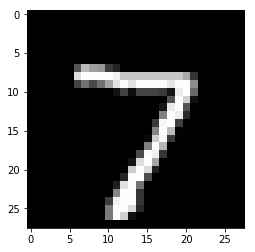



Final Output: 7


In [168]:
example = X_test[0]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))




----------------Contoured Image--------------------


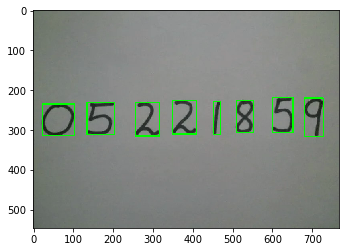

In [185]:
image = cv2.imread('../DATA/num_img.jpg')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
_, contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#plt.imshow(thresh)
preprocessed_digits = []
for c in contours:
    #print(c)
    x,y,w,h = cv2.boundingRect(c)
    #print(f'x:{x},y:{y},w:{w},h:{h}')
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




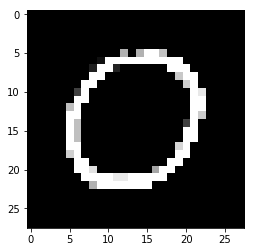



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




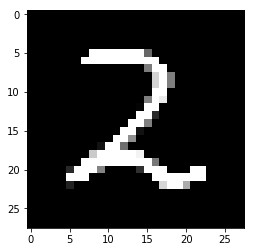



Final Output: 2

Prediction (Softmax) from the neural network:

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




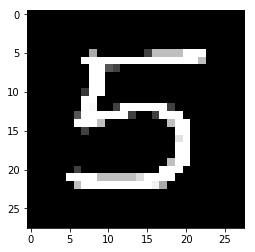



Final Output: 5

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




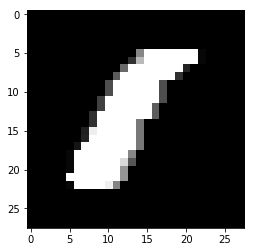



Final Output: 0

Prediction (Softmax) from the neural network:

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




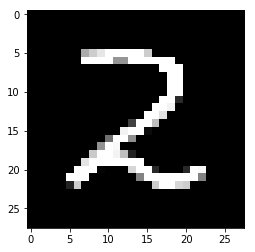



Final Output: 2

Prediction (Softmax) from the neural network:

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




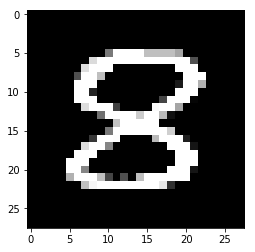



Final Output: 8

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




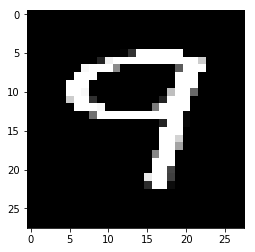



Final Output: 7

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




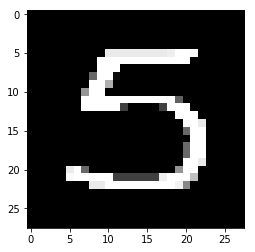



Final Output: 5

Prediction (Softmax) from the neural network:

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




In [186]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")